# MNIST with Tensorflow: The Basic, Ugly Way

Let's build a multilayer perceptron with Tensorflow that will try to classify handwritten digits from the famous MNSIT dataset. For sure, the model we are about to make will perform only marginally well, but it will suffice as an example. The syntax style we will use to create, train, and evaluate our model is considerably more verbose that what we'll use later, but it's good to get a peek at how the sausage is made.

## Import modules and get the data.

This dataset is included with Tensorflow as two numpy arrays -- one for training and the other for testing.

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./', one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


## Data format.

The images are stored as arrays of values ranging from `0.0` to `1.0`, which represents the shades of the pixels. The original images were 28 by 28 pixels, but are now represented as flat vectors of 784 elements. It's possible to use matplotlib to visualize the original images.

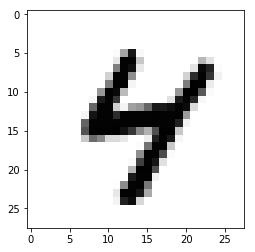

In [27]:
plt.imshow(mnist.train.images[101].reshape(28, 28), cmap='Greys')

## Parameters

To start there are three parameters we need to define. Getting the optimals values is a *very* difficult problem and is an area of study unto itself. Doing this step on a dataset that you're not familiar with could be a days-long task. Fortunately, the MNIST dataset is well-trodden ground, so there are some good suggestions out there.

In [38]:
learning_rate = 0.001 # Default 0.001
training_epochs = 15 # Default 15
batch_size = 100 # Default 100

n_hidden_1 = 256 # Default 256
n_hidden_2 = 256 # Default 256
n_input = 784 # Default 784
n_classes = 10 # Number of digits 0...9
n_samples = mnist.train.num_examples

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

def multilayer_perceptron(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(x, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
    }

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
    }

pred = multilayer_perceptron(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
init = tf.initialize_all_variables()

ValueError: Dimensions must be equal, but are 784 and 256 for 'MatMul_1' (op: 'MatMul') with input shapes: [?,784], [256,256].

Maybe save this for later 😒